In [1]:
# @author: asmita chatterjee


# Data set source : Boston housing data set 
# https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


# Purpose:
#    Data Set Characteristics:  

#     :Number of Instances: 506 

#     :Number of Attributes: 13 numeric/categorical predictive
    
#     :Median Value (attribute 14) is usually the target

#     :Attribute Information (in order):
#         - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#         - LSTAT    % lower status of the population
#         - MEDV     Median value of owner-occupied homes in $1000's


### Import the modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
###load the data 
boston_pd = pd.read_csv('C:/Users/USER/Documents/datasets/linear_regression/BostonHousing.csv')

In [3]:
###Checking number of rows and columns 

boston_pd.shape

(506, 14)

In [4]:
### check the columns
boston_pd.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
boston_pd.head(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
###Check the summary 

boston_pd.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
## Check for missing values


boston_pd.info()

## no missing values present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [8]:
# Next find out the correlation values 

correlation_matrix = boston_pd.corr().round(2)


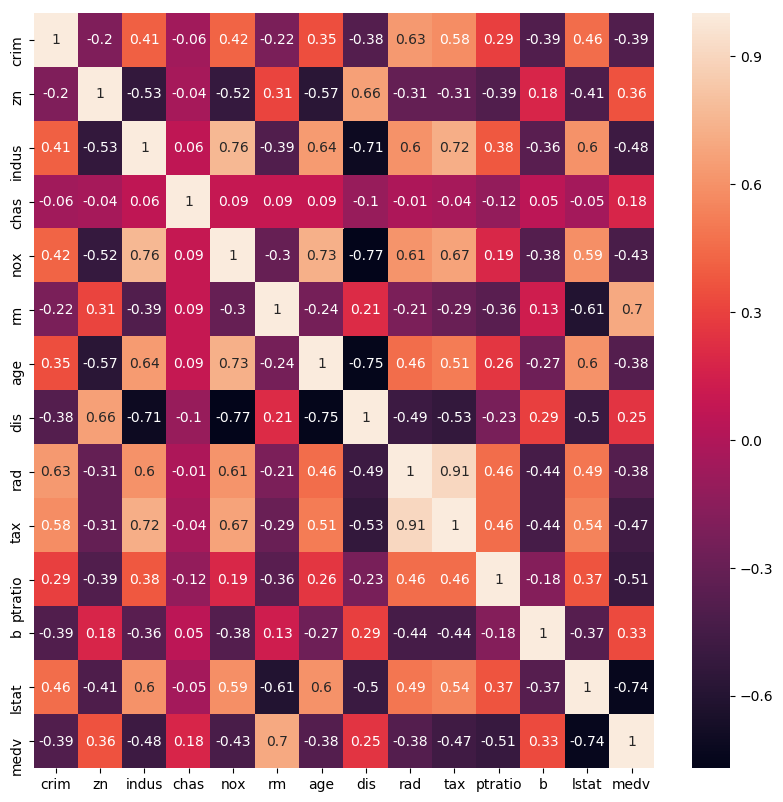

In [9]:
### plot the correlation values 
# annot = True to print the values inside the square
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(data=correlation_matrix, annot=True)

In [10]:
# We find out the  following  highly correlated variable pairs  : 
    
#     --> dis- indues 
    
#     --> dis-nox
    
#     -->dis- age 
    
#     --> rad- tax 
    
#      out of which , the variables rad-tax are highly correlated .
#      hence we will drop  any 1 variable , to avoid multi collinearity 
    
#     Let us drop tax 

boston_pd = boston_pd.drop(['tax'], axis=1)

In [11]:
boston_pd.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [12]:
### next  filtering the outliers 

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_pd))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [14]:
### Find out the shape 
z.shape

(506, 13)

In [13]:
##take a thresold of 3. Any values outside the z  value 3 is considered an outlier 
threshold = 3
print(np.where(z > 3))

##The first array contains the list of row numbers 
##and second array respective column numbers, which mean z[410][10] have a Z-score higher than 3.

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 10, 11,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 11,  5, 11,  0,  0,  0,
        0,  5,  0, 10, 10, 10, 11,  0, 11, 10, 10,  0, 10, 10, 10, 10, 10,
       10,  0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10

In [14]:
print(z[410][10])

3.8821945679249596


In [15]:
##remove the outliers 
boston_pd = boston_pd[(z < 3).all(axis=1)]

boston_pd.shape


(415, 13)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


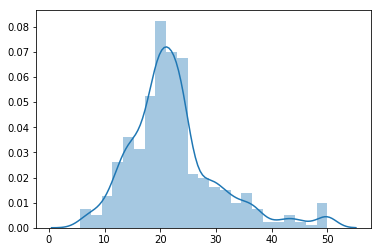

In [21]:
##next checkig the target value skew distribution 
## if highly skewed , 

sns.distplot(boston_pd.iloc[:,12:])

In [16]:
### The plot looks slightly right skewed 

boston_pd.iloc[:,12:].skew()

#  skew value greater than 1 denotes the distribution of  target variable  is highly skewed .
 
#  Hence , Log transformation will be used on the target variable .
#  We will be ding this shortly.

medv    1.119814
dtype: float64

In [17]:
boston_pd.shape

(415, 13)

In [18]:
boston_pd.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [19]:
### Now divide the data set 

X= boston_pd.iloc[:,0:12]
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [20]:
Y = boston_pd.iloc[:,12:]
Y.columns

Index(['medv'], dtype='object')

In [21]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1000) 

Y_log_train= np.log(Y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Model Building and Performance Test
# Once the data is ready, below steps are followed to build the models and test performance.

# Fit Linear Models
# Calculate Measures for the Models
# Residual Plot
# Model Performance

#  We will use the below steps for statsmodel


# 1)Add constants term into features----

# It is to be noted that statsmodels does not add intercept term automatically 
# thus we need to create an intercept to our model.


# 2)Fit the model for Log(target)
# 3)Print intercept and features estimates
# 4)Print model summary which includes estimates, p value, t value, standard error etc.
# 5)Calculate VIF

### add intercept to the model 
import statsmodels.api as sma
X_train = sma.add_constant(X_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(X_test) 



C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:

##Linear regression can be run by using sm.OLS:
import statsmodels.formula.api as sm
lm = sm.OLS(Y_log_train,X_train).fit()

In [24]:
###Printing the coefficient with Intercept:

print(lm.params)

const      3.580139e+00
crim      -2.013518e-02
zn        -2.814207e-04
indus     -2.081880e-03
chas       4.555227e-15
nox       -5.062646e-01
rm         1.404626e-01
age       -6.618337e-04
dis       -4.016441e-02
rad        7.220335e-03
ptratio   -3.815971e-02
b          2.052060e-04
lstat     -2.449623e-02
dtype: float64


In [25]:
##Printing the summary of the model:

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     72.94
Date:                Sat, 04 May 2019   Prob (F-statistic):           2.76e-75
Time:                        18:47:39   Log-Likelihood:                 83.803
No. Observations:                 290   AIC:                            -143.6
Df Residuals:                     278   BIC:                            -99.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5801      0.278     12.879      0.000       3.033       4.127
crim          -0.0201      0.004     -5.242      0.000      -0.028      -0.013
zn            -0.0003      0.001     -0.363      0.717      -0.002       0.001
indus         -0.0021      0.003     -0.747      0.456      -0.008       0.003
chas        4.555e-15   1.84e-15      2.479      0.014    9.38e-16    8.17e-15
nox           -0.5063      0.203     -2.500      0.013      -0.905      -0.108
rm             0.1405      0.024      5.754      0.000       0.092       0.189
age           -0.0007      0.001     -1.048      0.296      -0.002       0.001
dis           -0.0402      0.010     -3.828      0.000      -0.061      -0.020
rad            0.0072      0.003      2.871      0.004       0.002       0.012
ptratio       -0.0382      0.007     -5.833      0.000      -0.051      -0.025
b              0.0002      0.000      0.975      0.331      -0.000       0.001
lstat         -0.0245      0.003     -8.484      0.000      -0.030      -0.019
==============================================================================
Omnibus:                       48.519   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.484
Skew:                           0.548   Prob(JB):                     7.33e-52
Kurtosis:                       7.276   Cond. No.                     8.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.86e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
# The 4 variables , are having p values more  than 0.05 , hence for these  feature / variables 
# the coeeficents are 0 as per alternative hypothesis :
# -->zn  --0.717
# -->indus  --0.456
# -->age       ---0.296
# -->b         ----0.331
# hence these variables are insignificant .

# But we will remove 1 variable at a time , re - run the model and then again check p values 
# we will remove zn having highest p value s

## drop zn
X_train = X_train.drop(['zn'], axis=1)
X_train.columns

###drop zn 
X_test = X_test.drop(['zn'], axis=1)
X_test.columns

Index(['const', 'crim', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [27]:
## re - run the   model 

##Linear regression can be run by using sm.OLS:

lm_1 = sm.OLS(Y_log_train,X_train).fit()

##Printing the summary of the model:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     80.48
Date:                Sat, 04 May 2019   Prob (F-statistic):           3.20e-76
Time:                        18:48:10   Log-Likelihood:                 83.734
No. Observations:                 290   AIC:                            -145.5
Df Residuals:                     279   BIC:                            -105.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5730      0.277     12.906      0.000       3.028       4.118
crim          -0.0203      0.004     -5.319      0.000      -0.028      -0.013
indus         -0.0021      0.003     -0.752      0.452      -0.008       0.003
chas        2.446e-14   2.69e-15      9.108      0.000    1.92e-14    2.97e-14
nox           -0.5038      0.202     -2.493      0.013      -0.902      -0.106
rm             0.1396      0.024      5.754      0.000       0.092       0.187
age           -0.0006      0.001     -1.025      0.306      -0.002       0.001
dis           -0.0417      0.010     -4.320      0.000      -0.061      -0.023
rad            0.0072      0.003      2.864      0.005       0.002       0.012
ptratio       -0.0374      0.006     -6.036      0.000      -0.050      -0.025
b              0.0002      0.000      0.976      0.330      -0.000       0.001
lstat         -0.0245      0.003     -8.499      0.000      -0.030      -0.019
==============================================================================
Omnibus:                       48.259   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.553
Skew:                           0.545   Prob(JB):                     1.93e-51
Kurtosis:                       7.259   Cond. No.                     1.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
## remove indus 

## drop zn
X_train = X_train.drop(['indus'], axis=1)
X_train.columns

###drop zn 
X_test = X_test.drop(['indus'], axis=1)
X_test.columns


Index(['const', 'crim', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio',
       'b', 'lstat'],
      dtype='object')

In [29]:
## re - run the   model 

##Linear regression can be run by using sm.OLS:

lm_2 = sm.OLS(Y_log_train,X_train).fit()

##Printing the summary of the model:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 04 May 2019   Prob (F-statistic):           4.34e-77
Time:                        18:48:25   Log-Likelihood:                 83.440
No. Observations:                 290   AIC:                            -146.9
Df Residuals:                     280   BIC:                            -110.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5804      0.276     12.951      0.000       3.036       4.125
crim          -0.0201      0.004     -5.282      0.000      -0.028      -0.013
chas        7.385e-14   8.79e-15      8.399      0.000    5.65e-14    9.12e-14
nox           -0.5531      0.191     -2.896      0.004      -0.929      -0.177
rm             0.1416      0.024      5.870      0.000       0.094       0.189
age           -0.0006      0.001     -0.997      0.320      -0.002       0.001
dis           -0.0399      0.009     -4.269      0.000      -0.058      -0.021
rad            0.0069      0.002      2.789      0.006       0.002       0.012
ptratio       -0.0386      0.006     -6.469      0.000      -0.050      -0.027
b              0.0002      0.000      1.037      0.301      -0.000       0.001
lstat         -0.0248      0.003     -8.661      0.000      -0.030      -0.019
==============================================================================
Omnibus:                       48.007   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.830
Skew:                           0.551   Prob(JB):                     9.15e-50
Kurtosis:                       7.180   Cond. No.                     1.01e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
## remove age 
## drop age
X_train = X_train.drop(['age'], axis=1)
X_train.columns

###drop age 
X_test = X_test.drop(['age'], axis=1)
X_test.columns


Index(['const', 'crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'b',
       'lstat'],
      dtype='object')

In [31]:
## re - run the   model 

##Linear regression can be run by using sm.OLS:

lm_3 = sm.OLS(Y_log_train,X_train).fit()

##Printing the summary of the model:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 04 May 2019   Prob (F-statistic):           6.84e-78
Time:                        18:48:45   Log-Likelihood:                 82.926
No. Observations:                 290   AIC:                            -147.9
Df Residuals:                     281   BIC:                            -114.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6219      0.273     13.252      0.000       3.084       4.160
crim          -0.0199      0.004     -5.239      0.000      -0.027      -0.012
chas        3.705e-15   1.16e-15      3.196      0.002    1.42e-15    5.99e-15
nox           -0.6094      0.183     -3.339      0.001      -0.969      -0.250
rm             0.1361      0.023      5.795      0.000       0.090       0.182
dis           -0.0369      0.009     -4.168      0.000      -0.054      -0.019
rad            0.0071      0.002      2.860      0.005       0.002       0.012
ptratio       -0.0394      0.006     -6.664      0.000      -0.051      -0.028
b              0.0002      0.000      0.980      0.328      -0.000       0.001
lstat         -0.0258      0.003     -9.694      0.000      -0.031      -0.021
==============================================================================
Omnibus:                       45.058   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.635
Skew:                           0.524   Prob(JB):                     4.46e-44
Kurtosis:                       6.927   Cond. No.                     4.89e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
## drop b
X_train = X_train.drop(['b'], axis=1)
X_train.columns

###drop zn 
X_test = X_test.drop(['b'], axis=1)
X_test.columns


Index(['const', 'crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'lstat'], dtype='object')

In [33]:
lm_4 = sm.OLS(Y_log_train,X_train).fit()

##Printing the summary of the model:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sat, 04 May 2019   Prob (F-statistic):           9.90e-79
Time:                        18:49:00   Log-Likelihood:                 82.432
No. Observations:                 290   AIC:                            -148.9
Df Residuals:                     282   BIC:                            -119.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7075      0.259     14.318      0.000       3.198       4.217
crim          -0.0202      0.004     -5.337      0.000      -0.028      -0.013
chas       -2.758e-15   7.53e-16     -3.664      0.000   -4.24e-15   -1.28e-15
nox           -0.6379      0.180     -3.541      0.000      -0.993      -0.283
rm             0.1365      0.023      5.814      0.000       0.090       0.183
dis           -0.0373      0.009     -4.208      0.000      -0.055      -0.020
rad            0.0069      0.002      2.789      0.006       0.002       0.012
ptratio       -0.0390      0.006     -6.606      0.000      -0.051      -0.027
lstat         -0.0259      0.003     -9.756      0.000      -0.031      -0.021
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.208
Skew:                           0.520   Prob(JB):                     2.72e-40
Kurtosis:                       6.741   Cond. No.                     2.35e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
### all the variables are having significance level less tha 0.05 

## print r sq and adjusted r sq

print(lm_4.rsquared, lm_4.rsquared_adj)

0.7402403423940718 0.733792407630804


In [35]:
## to convert the transformed value , we use antilog so that y_pred
## is in the same scale as Y train or y_test
y_pred = np.exp(lm_4.predict(X_test))

type(y_pred)# Series

pandas.core.series.Series

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(Y_test, y_pred))

0.8470000775668097


In [37]:
RMSE_2 =np.sqrt(mean_squared_error(Y_test, y_pred))
print(RMSE_2)

3.2242525194421816


In [38]:
# Now checking the assumptions 
#### Checking Multi collinearity 
## mention  dataframe of vif 
vif = pd.DataFrame()

In [39]:
### Now detecting multi collinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif["features"] = X_train.columns

vif.round(2) 


C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,570.21,const
1,3.10,crim
2,NaN,chas
3,3.52,nox
4,1.68,rm
5,2.57,dis
6,3.43,rad
7,1.44,ptratio
8,2.54,lstat


In [40]:
##  if we keep a threshold of VIF 2.5 , then there are 3 variables which 
### sriously violates this cut off value 
# those are crim , rad, nox
##remove rad and nox 

## drop rad and nox 
X_train = X_train.drop(['rad','nox'], axis=1)
X_train.columns

###drop rad  and nox 
X_test = X_test.drop(['rad','nox'], axis=1)
X_test.columns


Index(['const', 'crim', 'chas', 'rm', 'dis', 'ptratio', 'lstat'], dtype='object')

In [41]:
## also remove nox and crim 

lm_5 = sm.OLS(Y_log_train,X_train).fit()

##Printing the summary of the model:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     150.4
Date:                Sat, 04 May 2019   Prob (F-statistic):           1.25e-77
Time:                        18:51:04   Log-Likelihood:                 74.612
No. Observations:                 290   AIC:                            -137.2
Df Residuals:                     284   BIC:                            -115.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1069      0.211     14.706      0.000       2.691       3.523
crim          -0.0142      0.003     -5.106      0.000      -0.020      -0.009
chas       -8.289e-17   4.24e-18    -19.564      0.000   -9.12e-17   -7.46e-17
rm             0.1498      0.024      6.317      0.000       0.103       0.197
dis           -0.0183      0.007     -2.742      0.006      -0.031      -0.005
ptratio       -0.0294      0.005     -5.389      0.000      -0.040      -0.019
lstat         -0.0289      0.003    -11.216      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       54.068   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.522
Skew:                           0.663   Prob(JB):                     4.85e-54
Kurtosis:                       7.308   Cond. No.                     2.23e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
## to convert the transformed value , we use antilog so that y_pred
## is in the same scale as Y train or y_test
y_pred = np.exp(lm_5.predict(X_test) )

type(y_pred)# Series

pandas.core.series.Series

In [43]:

from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(Y_test, y_pred))

0.8406846267306364


In [44]:
RMSE_2 =np.sqrt(mean_squared_error(Y_test, y_pred))
print(RMSE_2)

3.2901241445064673


In [46]:
###Check normality of residuals 

# We use Shapiro Wilk test  from scipy library to check the normality of residuals.
# Null Hypothesis: The residuals are normally distributed.
# Alternative Hypothesis: The residuals are not normally distributed.

lm_5.resid


342   -0.450739
394   -0.158344
42     0.000731
166    0.222417
313   -0.140101
136    0.011486
254   -0.093773
89    -0.059182
131   -0.043036
309   -0.100143
227    0.033258
332   -0.199849
143    0.100618
505   -0.642066
255   -0.028532
402   -0.226006
315   -0.227477
291    0.203523
464    0.167926
116   -0.055115
97     0.056730
197   -0.006688
114   -0.257484
328   -0.144491
459    0.142909
139    0.045645
285   -0.160920
301   -0.154184
115   -0.061953
51    -0.110699
         ...   
253    0.244718
245    0.214502
168   -0.059868
242   -0.016728
237   -0.027693
287   -0.063926
460   -0.129254
413    0.522696
268    0.080571
329   -0.132255
157    0.190402
263   -0.013625
375   -0.209219
341    0.039190
206    0.086806
335   -0.026448
251   -0.056597
500   -0.161037
446   -0.120309
40     0.088066
45    -0.080881
417    0.202908
132    0.069570
300   -0.170815
422    0.290273
430   -0.121900
294   -0.056950
215    0.081393
74    -0.039735
90    -0.115123
Length: 290, dtype: floa

In [47]:
from scipy import stats
stats.shapiro(lm_5.resid)

(0.9290702939033508, 1.553832479350703e-10)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


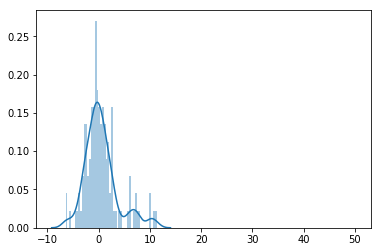

In [51]:
### p value :  1.553832479350703e-10,
 ##hence  the 1st assumption is violated , that is  residulas are not normally distributed 
 ### p value :  1.553832479350703e-10,
 ##hence  the 1st assumption is violated , that is  residulas are not normally distributed 
Y_test_series = pd.to_numeric(Y_test.medv, errors='coerce')
sns.distplot((Y_test_series-y_pred),bins=50)
plt.scatter(Y_test_series,y_pred)## almost normal . with bimodal plot 
 ## The model needs a  bit of improvemnt     
    

In [52]:
 ### Checking for autocorrelation

#  To ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(lm_5.resid , lags = 1) 
### p value :0.20449441 hence there is no autocorrelation


(array([1.60998148]), array([0.20449441]))

In [53]:
##Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.
###Null Hypothesis: Error terms are homoscedastic
###Alternative Hypothesis: Error terms are heteroscedastic.
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(lm_5.resid, lm_5.model.exog)
lzip(name, test)
##The p-value is 0.9569448388874647 hence we can say that the residuals have constant variance

[('F statistic', 0.7466290740839951), ('p-value', 0.9569448388874647)]

In [ ]:
### hence , except the  normality f residuals , we find out that all the other assumptuons are satisfied
## for  linear regression

##  for improvment of the model , we can try cross valdiation 